In [38]:
from wordcloud import STOPWORDS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# The tidytext package isn't in Google Colaboratory's default list of packages, so we install it first
!pip install tidytext
import tidytext
# This library is used by tidytext for tokenization
import nltk
nltk.download('punkt')

import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
GTC_V2 = pd.read_csv('https://raw.githubusercontent.com/MiriamSchirmer/genocide-transcript-corpus/main/Dataset_GTC-V2.csv', sep =';')

GTC_V2.head(3)

,tribunal,id_transcript,case,accused,date,text,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document,url
0,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Good morning, everybody. Mr. Re...",0,JudgeProc,[UB],1,23,63d000d797ad59b4cfc626f2,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
1,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. HOMETOWU: Thank you, Mr. President. Trial ...",0,Court Proceedings,[UB],1,120,63d0010e97ad59b4cfc62704,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...
2,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22 00:00:00 UTC,"MR. PRESIDENT: Appearances, please.",0,JudgeProc,[UB],1,525,63d000fd97ad59b4cfc626ff,639a47b297ad59b4cfc56852,https://ucr.irmct.org/LegalRef/CMSDocStore/Pub...


In [45]:
GTC_to_use = GTC_V2.loc[GTC_V2['tribunal']!='ICTR']

In [46]:
GTC_to_use['tribunal'].value_counts()

tribunal
ICTY    19217
ECCC    15876
Name: count, dtype: int64

In [47]:
df = tidytext.unnest_tokens(GTC_to_use, 'word', 'text')
df.head()

,tribunal,id_transcript,case,accused,date,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document,url,word
1039,ICTY,070118ED,IT-05-88,Vujadin Popovic et al.,2007-01-18 00:00:00 UTC,0,Court Proceedings,[PW-149],1,0,63b6e50b97ad59b4cfc5980b,63a60ce097ad59b4cfc571c7,https://www.icty.org/x/cases/popovic/trans/en/...,thursday
1039,ICTY,070118ED,IT-05-88,Vujadin Popovic et al.,2007-01-18 00:00:00 UTC,0,Court Proceedings,[PW-149],1,0,63b6e50b97ad59b4cfc5980b,63a60ce097ad59b4cfc571c7,https://www.icty.org/x/cases/popovic/trans/en/...,18
1039,ICTY,070118ED,IT-05-88,Vujadin Popovic et al.,2007-01-18 00:00:00 UTC,0,Court Proceedings,[PW-149],1,0,63b6e50b97ad59b4cfc5980b,63a60ce097ad59b4cfc571c7,https://www.icty.org/x/cases/popovic/trans/en/...,january
1039,ICTY,070118ED,IT-05-88,Vujadin Popovic et al.,2007-01-18 00:00:00 UTC,0,Court Proceedings,[PW-149],1,0,63b6e50b97ad59b4cfc5980b,63a60ce097ad59b4cfc571c7,https://www.icty.org/x/cases/popovic/trans/en/...,2007
1039,ICTY,070118ED,IT-05-88,Vujadin Popovic et al.,2007-01-18 00:00:00 UTC,0,Court Proceedings,[PW-149],1,0,63b6e50b97ad59b4cfc5980b,63a60ce097ad59b4cfc571c7,https://www.icty.org/x/cases/popovic/trans/en/...,open


In [48]:
df['role'].value_counts()

role
Witness              481968
LawyerQA             293362
LawyerProc           147968
JudgeProc            138931
JudgeQA               70319
Accused               51932
Court Proceedings     37734
Name: count, dtype: int64

In [49]:
df = df.loc[df['role']=='Witness']
df = df[['tribunal', 'word']]
df.head()

,tribunal,word
1049,ICTY,the
1049,ICTY,witness
1049,ICTY,interpretation
1049,ICTY,good
1049,ICTY,afternoon


In [50]:
counts = df.groupby("tribunal")["word"].value_counts()
counts

tribunal  word        
ECCC      the             15080
          i               12203
          and              8943
          a                8607
          to               8303
                          ...  
ICTY      hospitalised        1
          hospitable          1
          horror              1
          horrified           1
          horrific            1
Name: count, Length: 16774, dtype: int64

In [51]:
counts.name = "n"
counts = counts.reset_index()
counts.head()

,tribunal,word,n
0,ECCC,the,15080
1,ECCC,i,12203
2,ECCC,and,8943
3,ECCC,a,8607
4,ECCC,to,8303


In [52]:
tfidf = tidytext.bind_tf_idf(counts, "word", "tribunal", "n")
tfidf

,tribunal,word,n,tf,idf,tf_idf
0,ECCC,the,15080,0.056746,0.000000,0.000000
1,ECCC,i,12203,0.045920,0.000000,0.000000
2,ECCC,and,8943,0.033652,0.000000,0.000000
3,ECCC,a,8607,0.032388,0.000000,0.000000
4,ECCC,to,8303,0.031244,0.000000,0.000000
...,...,...,...,...,...,...
16769,ICTY,hospitalised,1,0.000005,0.000000,0.000000
16770,ICTY,hospitable,1,0.000005,0.693147,0.000003
16771,ICTY,horror,1,0.000005,0.000000,0.000000
16772,ICTY,horrified,1,0.000005,0.000000,0.000000


In [53]:
tfidf = tfidf.loc[tfidf["tf_idf"] != 0]
tfidf

,tribunal,word,n,tf,idf,tf_idf
68,ECCC,ta,496,0.001866,0.693147,0.001294
99,ECCC,phnom,310,0.001167,0.693147,0.000809
102,ECCC,penh,301,0.001133,0.693147,0.000785
112,ECCC,rice,292,0.001099,0.693147,0.000762
120,ECCC,phonetic,275,0.001035,0.693147,0.000717
...,...,...,...,...,...,...
16764,ICTY,hottest,1,0.000005,0.693147,0.000003
16765,ICTY,hotels,1,0.000005,0.693147,0.000003
16766,ICTY,hota,1,0.000005,0.693147,0.000003
16768,ICTY,hostages,1,0.000005,0.693147,0.000003


In [54]:
tfidf = tfidf.sort_values("tf_idf", ascending=False)
tfidf

,tribunal,word,n,tf,idf,tf_idf
68,ECCC,ta,496,0.001866,0.693147,0.001294
8605,ICTY,prijedor,270,0.001249,0.693147,0.000866
99,ECCC,phnom,310,0.001167,0.693147,0.000809
102,ECCC,penh,301,0.001133,0.693147,0.000785
112,ECCC,rice,292,0.001099,0.693147,0.000762
...,...,...,...,...,...,...
7552,ECCC,westwards,1,0.000004,0.693147,0.000003
7553,ECCC,weaker,1,0.000004,0.693147,0.000003
7554,ECCC,watery,1,0.000004,0.693147,0.000003
7555,ECCC,warfare,1,0.000004,0.693147,0.000003


In [55]:
tfidf['tribunal'].value_counts()

tribunal
ECCC    4408
ICTY    4174
Name: count, dtype: int64

In [58]:
my_stop=list()
my_stop.append('phonetic')
my_stop.append('ta')

In [75]:
ECCC_tfidf=tfidf.loc[tfidf["tribunal"] == "ECCC"].head(25)
ECCC_tfidf=ECCC_tfidf.loc[~ECCC_tfidf['word'].isin(my_stop)].head(20)
ICTY_tfidf=tfidf.loc[tfidf['tribunal'] == "ICTY"].head(40)
ECCC_tfidf

,tribunal,word,n,tf,idf,tf_idf
99,ECCC,phnom,310,0.001167,0.693147,0.000809
102,ECCC,penh,301,0.001133,0.693147,0.000785
112,ECCC,rice,292,0.001099,0.693147,0.000762
127,ECCC,vietnamese,263,0.000990,0.693147,0.000686
136,ECCC,khmer,251,0.000945,0.693147,0.000655
157,ECCC,s21,214,0.000805,0.693147,0.000558
178,ECCC,tuol,189,0.000711,0.693147,0.000493
180,ECCC,duch,187,0.000704,0.693147,0.000488
189,ECCC,angkar,179,0.000674,0.693147,0.000467
220,ECCC,sleng,143,0.000538,0.693147,0.000373


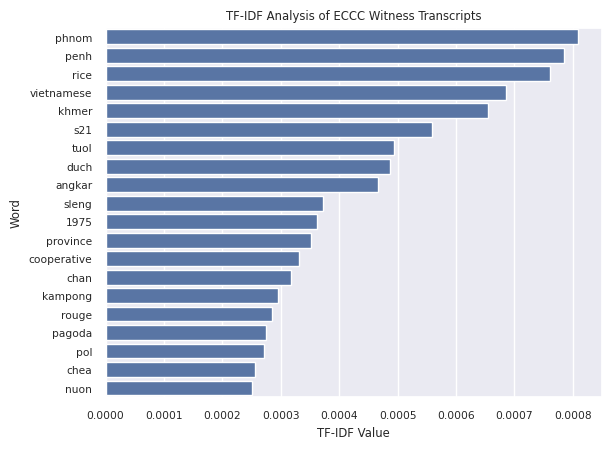

In [76]:
ECCtoplot = ECCC_tfidf
sns.barplot(ECCC_tfidf, x = 'tf_idf', y = 'word')
plt.xlabel('TF-IDF Value')
plt.ylabel('Word')
plt.title('TF-IDF Analysis of ECCC Witness Transcripts')
plt.show()